In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/Users/angwang-yun/Desktop/Project/coor/preprocessing/apartment_with_nearest_schools.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900345 entries, 0 to 900344
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   단지명              900345 non-null  object 
 1   주택유형             900345 non-null  object 
 2   전체주소             900345 non-null  object 
 3   계약날짜             900345 non-null  object 
 4   계약구분보완(범주)       900345 non-null  object 
 5   계약분기             900345 non-null  int64  
 6   건축년도             900345 non-null  int64  
 7   계약연도             900345 non-null  int64  
 8   계약개월수            900345 non-null  int64  
 9   층                900345 non-null  int64  
 10  전용면적m            900345 non-null  float64
 11  갱신요구권사용(2진)      900345 non-null  int64  
 12  종전계약유무(2진)       900345 non-null  int64  
 13  보증금만원            900345 non-null  float64
 14  종전계약보증금만원        900345 non-null  float64
 15  보증금변화만원          900345 non-null  float64
 16  보증금log           900345 non-null  floa

In [4]:
df.columns

Index(['단지명', '주택유형', '전체주소', '계약날짜', '계약구분보완(범주)', '계약분기', '건축년도', '계약연도',
       '계약개월수', '층', '전용면적m', '갱신요구권사용(2진)', '종전계약유무(2진)', '보증금만원',
       '종전계약보증금만원', '보증금변화만원', '보증금log', '보증금면적비', '단지별평균보증금만원', 'Index',
       'Rate', 'PpRate', '단지갯수', '구갯수', '구_단지별_이상치(2진)', '구_단지별_이상치만원(2진)',
       '단지클러스터', '보증금구간', '위도', '경도', '가까운_지하철역', '지하철_거리(m)', '상권_거리(m)',
       '최근접 초등학교', '초등학교 거리(미터)'],
      dtype='object')

In [5]:
df.head(30)

,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,건축년도,계약연도,계약개월수,층,...,구_단지별_이상치만원(2진),단지클러스터,보증금구간,위도,경도,가까운_지하철역,지하철_거리(m),상권_거리(m),최근접 초등학교,초등학교 거리(미터)
0,대성유니드,아파트,서울특별시 성동구 마장로37길 7,2019-04-30,신규,2,2004,2019,24,18,...,0,4,mid,37.566939,127.038685,마장,386.605843,89439.523820,서울동명초등학교,342.200105
1,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,2000,2019,24,12,...,0,4,mid,37.554809,127.027400,행당,331.830814,88102.788466,서울금북초등학교,451.914304
2,대림e-편한세상,아파트,서울특별시 성동구 행당로 79,2019-04-30,신규,2,2000,2019,24,2,...,0,4,mid,37.558205,127.027507,행당,201.533731,88479.568599,서울금북초등학교,357.832334
3,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,8,...,0,2,high,37.570861,126.962352,독립문,566.332822,90155.342224,서울금화초등학교,231.623284
4,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,6,...,0,2,high,37.570861,126.962352,독립문,566.332822,90155.342224,서울금화초등학교,231.623284
5,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,2000,2019,24,16,...,0,4,high,37.554809,127.027400,행당,331.830814,88102.788466,서울금북초등학교,451.914304
6,대림(1차),아파트,서울특별시 성동구 독서당로62길 43,2019-04-30,신규,2,1986,2019,24,4,...,0,0,mid,37.551901,127.033526,행당,697.419105,87773.481117,서울응봉초등학교,184.812269
7,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,8,...,0,2,high,37.570861,126.962352,독립문,566.332822,90155.342224,서울금화초등학교,231.623284
8,왕궁,아파트,서울특별시 용산구 이촌로88길 15,2019-04-30,신규,2,1974,2019,24,5,...,0,0,mid,37.517255,126.978273,이촌,729.019822,84118.135100,서울신용산초등학교,454.180749
9,점보,아파트,서울특별시 용산구 이촌로88길 3,2019-04-30,신규,2,1974,2019,24,9,...,0,2,high,37.518029,126.978695,이촌,687.167557,84201.315619,서울신용산초등학교,412.148713


## 단지 클러스터링

In [29]:
from sklearn.cluster import KMeans
import pandas as pd

# ✅ Step 1: 거래량이 10개 미만인 데이터 제거
grouped_count = df.groupby(["단지명", "전용면적m"]).size().reset_index(name="거래량")
df = df.merge(grouped_count, on=["단지명", "전용면적m"], how="left")
df = df[df["거래량"] >= 10]  # 거래량 10개 이상인 데이터만 유지

# ✅ Step 2: "구-단지명-전용면적" 기준으로 그룹화하여 평균 전세가 & 거래량 계산
grouped_df = df.groupby(["단지명", "전용면적m"]).agg(
    평균전세가=("보증금만원", "mean"),  
    거래량=("보증금만원", "count")  
).reset_index()

# ✅ Step 3: K=30으로 클러스터링 수행
cluster_features = grouped_df[["평균전세가", "거래량", "전용면적m"]]
kmeans = KMeans(n_clusters=35, random_state=42, n_init=10)
grouped_df["클러스터"] = kmeans.fit_predict(cluster_features)

# ✅ Step 4: 클러스터링 결과를 원본 데이터와 병합
df = df.merge(grouped_df[["단지명", "전용면적m", "클러스터"]], 
              on=["단지명", "전용면적m"], how="left")

# ✅ 최종 데이터 크기 확인
print(f"📌 최종 필터링 후 데이터 개수: {len(df)}")

# ✅ 최종 데이터 확인
df.head()

📌 최종 필터링 후 데이터 개수: 898053


,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,건축년도,계약연도,계약개월수,층,...,보증금구간,위도,경도,가까운_지하철역,지하철_거리(m),상권_거리(m),최근접 초등학교,초등학교 거리(미터),거래량,클러스터
0,대성유니드,아파트,서울특별시 성동구 마장로37길 7,2019-04-30,신규,2,2004,2019,24,18,...,mid,37.566939,127.038685,마장,386.605843,89439.523820,서울동명초등학교,342.200105,86,16
1,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,2000,2019,24,12,...,mid,37.554809,127.027400,행당,331.830814,88102.788466,서울금북초등학교,451.914304,373,29
2,대림e-편한세상,아파트,서울특별시 성동구 행당로 79,2019-04-30,신규,2,2000,2019,24,2,...,mid,37.558205,127.027507,행당,201.533731,88479.568599,서울금북초등학교,357.832334,509,18
3,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,8,...,high,37.570861,126.962352,독립문,566.332822,90155.342224,서울금화초등학교,231.623284,107,9
4,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,6,...,high,37.570861,126.962352,독립문,566.332822,90155.342224,서울금화초등학교,231.623284,106,14


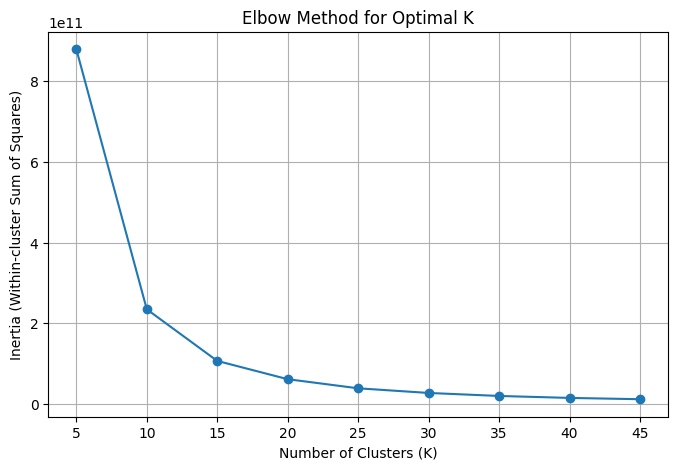

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ✅ 클러스터링에 사용할 Feature 선택
cluster_features = grouped_df[["평균전세가", "거래량", "전용면적m"]]

# ✅ 최적 클러스터 개수 찾기 (엘보우 방법)
inertia = []
K_range = range(5, 50, 5)  # 5개부터 50개까지 테스트

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_features)
    inertia.append(kmeans.inertia_)

# ✅ 결과 시각화 (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

## 데이터 분리

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df.describe()

,계약분기,건축년도,계약연도,계약개월수,층,전용면적m,갱신요구권사용(2진),종전계약유무(2진),보증금만원,종전계약보증금만원,...,구_단지별_이상치(2진),구_단지별_이상치만원(2진),단지클러스터,위도,경도,지하철_거리(m),상권_거리(m),초등학교 거리(미터),거래량,클러스터
count,898053.000000,898053.000000,898053.000000,898053.000000,898053.000000,898053.000000,898053.000000,898053.000000,898053.000000,898053.000000,...,898053.000000,898053.000000,898053.000000,892579.000000,892579.000000,892579.000000,892579.000000,892579.000000,898053.000000,898053.000000
mean,2.498483,2003.266315,2021.222320,23.715726,9.247269,68.249602,0.097106,0.191854,46610.812650,9597.358282,...,0.004069,0.008083,3.471225,37.546885,126.994153,754.392770,87739.893953,394.987297,204.399748,17.336204
std,1.116920,12.073098,1.866074,2.475525,6.037219,28.691932,0.296102,0.393759,28271.927904,23567.415480,...,0.063657,0.089542,2.469428,0.052847,0.095939,611.054496,5770.923537,250.835207,270.380903,10.225431
min,1.000000,1965.000000,2018.000000,1.000000,-1.000000,10.780000,0.000000,0.000000,1500.000000,-1.000000,...,0.000000,0.000000,0.000000,37.446011,126.806400,22.048135,76193.493942,0.000000,10.000000,0.000000
25%,1.000000,1994.000000,2020.000000,24.000000,5.000000,50.810000,0.000000,0.000000,26000.000000,-1.000000,...,0.000000,0.000000,2.000000,37.504318,126.907456,368.494025,83031.963906,226.616705,47.000000,8.000000
50%,3.000000,2004.000000,2021.000000,24.000000,8.000000,59.993000,0.000000,0.000000,41000.000000,-1.000000,...,0.000000,0.000000,3.000000,37.540909,127.016359,578.905817,87087.067876,354.617316,113.000000,17.000000
75%,3.000000,2014.000000,2023.000000,24.000000,13.000000,84.920000,0.000000,0.000000,60000.000000,-1.000000,...,0.000000,0.000000,5.000000,37.574733,127.067910,906.442435,91285.211836,486.109801,247.000000,27.000000
max,4.000000,2024.000000,2024.000000,312.000000,68.000000,242.160000,1.000000,1.000000,199500.000000,300000.000000,...,1.000000,1.000000,9.000000,37.687503,127.181049,4470.167208,102822.139591,2267.016911,2246.000000,34.000000


In [31]:
df['보증금변화만원'].describe()

count    898053.000000
mean        924.894143
std        3579.761539
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max      274000.000000
Name: 보증금변화만원, dtype: float64

In [32]:
df['종전계약유무(2진)'].value_counts()

종전계약유무(2진)
0    725758
1    172295
Name: count, dtype: int64

In [33]:
features_1 = [
    "보증금만원",
    "계약분기", "건축년도", "계약연도", "계약개월수", "층", "전용면적m",
    "계약구분보완(범주)",
    
    "거래량",
    "갱신요구권사용(2진)", "종전계약유무(2진)", 
     "구_단지별_이상치만원(2진)", "클러스터",
    "지하철_거리(m)", "초등학교 거리(미터)",
    "Index", "Rate", "PpRate",
    "보증금면적비"  # 추가
]

In [34]:
df_1 = df[features_1]

In [35]:
features_2 = [
    "보증금만원",
    "계약분기", "건축년도", "계약연도", "계약개월수", "층", "전용면적m",
    "계약구분보완(범주)","거래량",
    
    "갱신요구권사용(2진)", "종전계약유무(2진)",
    "구_단지별_이상치만원(2진)", "클러스터",
    "지하철_거리(m)", "초등학교 거리(미터)",
    "Index", "Rate", "PpRate"
]

In [36]:
df_2 = df[features_2]

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898053 entries, 0 to 898052
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   보증금만원            898053 non-null  float64
 1   계약분기             898053 non-null  int64  
 2   건축년도             898053 non-null  int64  
 3   계약연도             898053 non-null  int64  
 4   계약개월수            898053 non-null  int64  
 5   층                898053 non-null  int64  
 6   전용면적m            898053 non-null  float64
 7   계약구분보완(범주)       898053 non-null  object 
 8   거래량              898053 non-null  int64  
 9   갱신요구권사용(2진)      898053 non-null  int64  
 10  종전계약유무(2진)       898053 non-null  int64  
 11  구_단지별_이상치만원(2진)  898053 non-null  int64  
 12  클러스터             898053 non-null  int32  
 13  지하철_거리(m)        892579 non-null  float64
 14  초등학교 거리(미터)      892579 non-null  float64
 15  Index            898053 non-null  float64
 16  Rate             898053 non-null  floa

In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 🚀 One-Hot Encoding 처리 (df_1_one, df_2_one)
df_1_one = df_1.copy()
df_1_one = pd.concat([df_1_one, pd.get_dummies(df_1_one['계약구분보완(범주)'], prefix='계약구분보완(범주)')], axis=1)
df_1_one.drop(columns=['계약구분보완(범주)'], inplace=True)  # 원본 컬럼 삭제

df_2_one = df_2.copy()
df_2_one = pd.concat([df_2_one, pd.get_dummies(df_2_one['계약구분보완(범주)'], prefix='계약구분보완(범주)')], axis=1)
df_2_one.drop(columns=['계약구분보완(범주)'], inplace=True)  # 원본 컬럼 삭제

# 🚀 Label Encoding 처리 (df_1_label, df_2_label)
df_1_label = df_1.copy()
df_1_label["계약구분보완(범주)"] = label_encoder.fit_transform(df_1_label["계약구분보완(범주)"])

df_2_label = df_2.copy()
df_2_label["계약구분보완(범주)"] = label_encoder.fit_transform(df_2_label["계약구분보완(범주)"])

In [39]:
df_1_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898053 entries, 0 to 898052
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   보증금만원            898053 non-null  float64
 1   계약분기             898053 non-null  int64  
 2   건축년도             898053 non-null  int64  
 3   계약연도             898053 non-null  int64  
 4   계약개월수            898053 non-null  int64  
 5   층                898053 non-null  int64  
 6   전용면적m            898053 non-null  float64
 7   거래량              898053 non-null  int64  
 8   갱신요구권사용(2진)      898053 non-null  int64  
 9   종전계약유무(2진)       898053 non-null  int64  
 10  구_단지별_이상치만원(2진)  898053 non-null  int64  
 11  클러스터             898053 non-null  int32  
 12  지하철_거리(m)        892579 non-null  float64
 13  초등학교 거리(미터)      892579 non-null  float64
 14  Index            898053 non-null  float64
 15  Rate             898053 non-null  float64
 16  PpRate           898053 non-null  floa

## 저장

In [40]:
df_1_one.to_csv('/Users/angwang-yun/Desktop/Project/coor/preprocessing/df_1_one.csv', index=False)
df_2_one.to_csv('/Users/angwang-yun/Desktop/Project/coor/preprocessing/df_2_one.csv', index=False)
df_1_label.to_csv('/Users/angwang-yun/Desktop/Project/coor/preprocessing/df_1_label.csv', index=False)
df_2_label.to_csv('/Users/angwang-yun/Desktop/Project/coor/preprocessing/df_2_label.csv', index=False)